In [1]:
import pandas as pd

dataset_for_evaluation = pd.read_excel("image_captions_fore_valuation_with_spice_scores.xlsx")
dataset_for_evaluation.head()

,image_key,title,caption,alt_text,precision,recall,f1_score,caption_dependencies,caption_word_pos,alt_text_dependencies,alt_text_word_pos
0,photos_for_semantic_search_poc/1528d961348c438...,Paris Olympics Table Tennis,"Cuba's Jorge Campos, with her teammate Daniela...","Close-up shot of a table tennis player, identi...",0.105263,0.048780,0.066667,"[{'governorGloss': 'campos', 'dep': 'nmod:poss...","{'cuba': 'NNP', ""'s"": 'POS', 'jorge': 'NNP', '...","[{'governorGloss': 'up', 'dep': 'advmod', 'dep...","{'close': 'RB', '-': 'HYPH', 'up': 'RP', 'shot..."
1,photos_for_semantic_search_poc/149582a31adb437...,Paris Olympics Soccer,Canada stand-in coach Andy Spence talks to Clo...,Mid-shot of Canada stand-in coach Andy Spence ...,0.533333,0.228571,0.320000,"[{'governorGloss': 'coach', 'dep': 'amod', 'de...","{'canada': 'NNP', 'stand': 'VB', '-': 'HYPH', ...","[{'governorGloss': 'stand', 'dep': 'nsubj', 'd...","{'mid-shot': 'NN', 'of': 'IN', 'canada': 'NNP'..."
2,photos_for_semantic_search_poc/01ca71a925e342b...,Paris Olympics Water Polo,Croatia's Luka Loncar scores a goal during a m...,Mid-shot of a water polo match during the 2024...,0.250000,0.105263,0.148148,"[{'governorGloss': 'scores', 'dep': 'nmod:poss...","{'croatia': 'NNP', ""'s"": 'POS', 'luka': 'NNP',...","[{'governorGloss': 'polo', 'dep': 'compound', ...","{'mid-shot': 'NN', 'of': 'IN', 'a': 'DT', 'wat..."
3,photos_for_semantic_search_poc/00aaf8a923e14e7...,Paris Olympics Soccer,"Uzbekistan's Jasurbek Jaloliddinov, left, take...",Wide shot of a soccer match at Parc des Prince...,0.714286,0.232558,0.350877,"[{'governorGloss': 'jaloliddinov', 'dep': 'nmo...","{'uzbekistan': 'NNP', ""'s"": 'POS', 'jasurbek':...","[{'governorGloss': 'shot', 'dep': 'amod', 'dep...","{'wide': 'JJ', 'shot': 'NN', 'of': 'IN', 'a': ..."
4,photos_for_semantic_search_poc/131044787c94452...,Paris Olympics Beach Volleyball,Nina Brunner reaches the ball during the women...,"A mid-shot captures Nina Brunner, wearing a bl...",0.800000,0.342857,0.480000,"[{'governorGloss': 'brunner', 'dep': 'compound...","{'nina': 'NNP', 'brunner': 'NNP', 'reaches': '...","[{'governorGloss': 'captures', 'dep': 'nsubj',...","{'a': 'DT', 'mid-shot': 'NN', 'captures': 'VBZ..."


In [10]:
import ast
import pandas as pd
from spice import plot_dependency_graph
from IPython.display import display as IPDisplay, Image as IPImage
from utils import download_image_from_s3, get_random_image, bucket_name


evaluated_dataset = pd.read_excel("image_captions_fore_valuation_with_spice_scores.xlsx")


def get_scores(image_key: str, plot=False, display=False):
    row = evaluated_dataset[evaluated_dataset["image_key"] == image_key]
    if row.empty:
        return None

    caption = row["caption"].values[0]
    alt_text = row["alt_text"].values[0]

    if display:
        image_data = download_image_from_s3(bucket_name, image_key)
        IPDisplay(IPImage(data=image_data))

    if plot:
        caption_dependencies = ast.literal_eval(row["caption_dependencies"].values[0])
        caption_word_pos = ast.literal_eval(row["caption_word_pos"].values[0])
        alt_text_dependencies = ast.literal_eval(row["alt_text_dependencies"].values[0])
        alt_text_word_pos = ast.literal_eval(row["alt_text_word_pos"].values[0])

        print(f"Caption Dependencies:{type(caption_dependencies)} {caption_dependencies}")
        print(f"Caption Word POS: {caption_word_pos}")
        
        plot_dependency_graph(caption_dependencies, caption_word_pos, additional_tags="Caption")
        plot_dependency_graph(alt_text_dependencies, alt_text_word_pos, additional_tags="Alt Text")

    print(f"Caption: {caption}")
    print(f"Alt Text: {alt_text}")
    print(f"SPICE Score: {row['f1_score'].values[0]}")

In [2]:
dataset_for_evaluation["f1_score"].mean()

0.224610695077716

In [18]:
dataset_for_evaluation[dataset_for_evaluation["f1_score"] > 0.0]["f1_score"].mean()

0.22712798254165373

In [22]:
len(dataset_for_evaluation[dataset_for_evaluation["f1_score"] == 0.0]) / len(dataset_for_evaluation) * 100

1.1083123425692696

array([[<Axes: title={'center': 'f1_score'}>]], dtype=object)

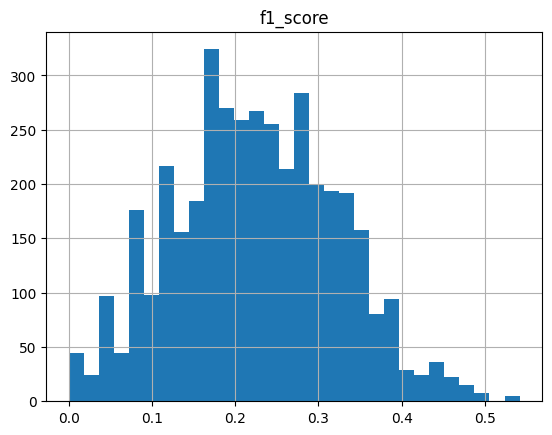

In [6]:
dataset_for_evaluation.hist(column="f1_score", bins=30)

In [4]:
dataset_for_evaluation["f1_score"].describe()

count    3970.000000
mean        0.224611
std         0.098395
min         0.000000
25%         0.156863
50%         0.222222
75%         0.291667
max         0.541667
Name: f1_score, dtype: float64

In [9]:
dataset_for_evaluation[dataset_for_evaluation["f1_score"] == dataset_for_evaluation["f1_score"].max()]["image_key"].values[0]

'photos_for_semantic_search_poc/13a9844a61344e09b33dcd37ec4a2a43.jpg'

Caption Dependencies:<class 'list'> [{'governorGloss': 'republic', 'dep': 'compound', 'dependentGloss': 'dominican'}, {'governorGloss': 'lucas', 'dep': 'nmod:poss', 'dependentGloss': 'republic'}, {'governorGloss': 'lucas', 'dep': 'compound', 'dependentGloss': 'luiyi'}, {'governorGloss': 'lucas', 'dep': 'compound', 'dependentGloss': 'de'}, {'governorGloss': 'yells', 'dep': 'nsubj', 'dependentGloss': 'lucas'}, {'governorGloss': 'match', 'dep': 'nmod:poss', 'dependentGloss': 'men'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'group'}, {'governorGloss': 'match', 'dep': 'compound', 'dependentGloss': 'c'}, {'governorGloss': 'match', 'dep': 'compound', 'dependentGloss': 'soccer'}, {'governorGloss': 'stadium', 'dep': 'compound', 'dependentGloss': 'bordeaux'}, {'governorGloss': 'olympics', 'dep': 'compound', 'dependentGloss': 'summer'}, {'governorGloss': 'yells', 'dep': 'obl:in', 'dependentGloss': 'bordeaux'}, {'governorGloss': 'castillo', 'dep': 'compound', 'dependentGloss': '

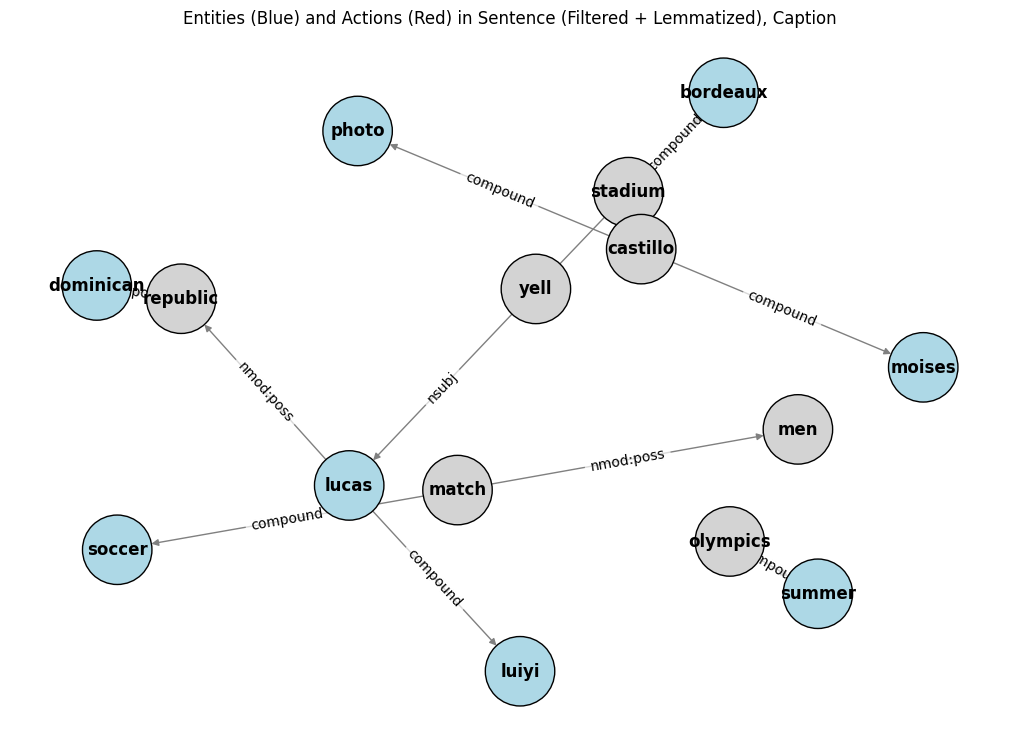

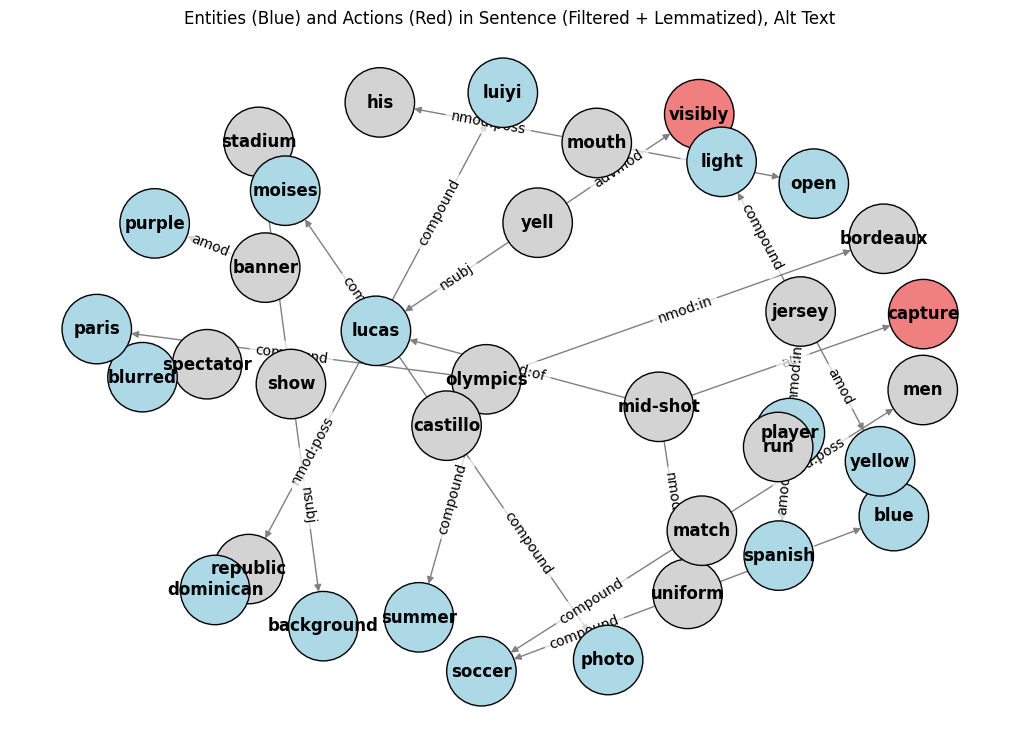

Caption: Dominican Republic's Luiyi De Lucas yells during the men's Group C soccer match against Spain at the Bordeaux stadium at the 2024 Summer Olympics, Saturday, July 27, 2024, in Bordeaux, France. (AP Photo/Moises Castillo)
Alt Text: Mid-shot of Dominican Republic's Luiyi De Lucas in a blue soccer uniform with number 5, captured during the men's Group C soccer match against Spain at the 2024 Summer Olympics in Bordeaux, France. De Lucas is visibly yelling, with his mouth open, and is in the foreground. To the right, a Spanish player in a light yellow jersey with number 9 is running. The background shows blurred spectators in a stadium with purple banners. The scene is set on July 27, 2024, during the Paris Olympics. The image is credited to AP Photo/Moises Castillo.
SPICE Score: 0.5416666666666666


In [11]:
image_key = "photos_for_semantic_search_poc/13a9844a61344e09b33dcd37ec4a2a43.jpg"
get_scores(image_key, plot=True, display=False)

In [ ]:
dataset_for_evaluation[dataset_for_evaluation["f1_score"] == dataset_for_evaluation["f1_score"].max()]["image_key"].values[0]

'photos_for_semantic_search_poc/01832175b62d4aa99d26402b27910475.jpg'

Caption Dependencies:<class 'list'> [{'governorGloss': 'react', 'dep': 'nsubj', 'dependentGloss': 'supporters'}, {'governorGloss': 'grimes', 'dep': 'compound', 'dependentGloss': 'katie'}, {'governorGloss': 'states', 'dep': 'compound', 'dependentGloss': 'united'}, {'governorGloss': 'grimes', 'dep': 'nmod:of', 'dependentGloss': 'states'}, {'governorGloss': 'grimes', 'dep': 'acl', 'dependentGloss': 'receives'}, {'governorGloss': 'medal', 'dep': 'nmod:poss', 'dependentGloss': 'her'}, {'governorGloss': 'medal', 'dep': 'compound', 'dependentGloss': 'silver'}, {'governorGloss': 'individual', 'dep': 'nmod:poss', 'dependentGloss': 'women'}, {'governorGloss': 'individual', 'dep': 'compound', 'dependentGloss': 'meter'}, {'governorGloss': 'medley', 'dep': 'amod', 'dependentGloss': 'final'}, {'governorGloss': 'olympics', 'dep': 'compound', 'dependentGloss': 'summer'}, {'governorGloss': 'monday', 'dep': 'amod', 'dependentGloss': '2024'}, {'governorGloss': 'monday', 'dep': 'nmod:in', 'dependentGloss'

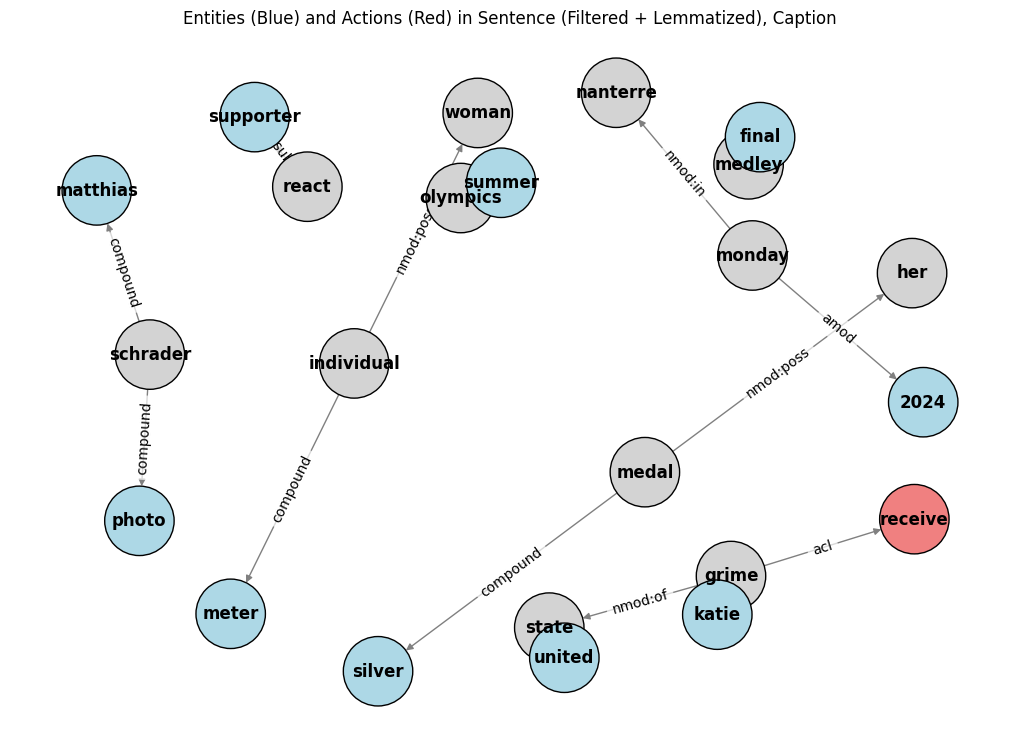

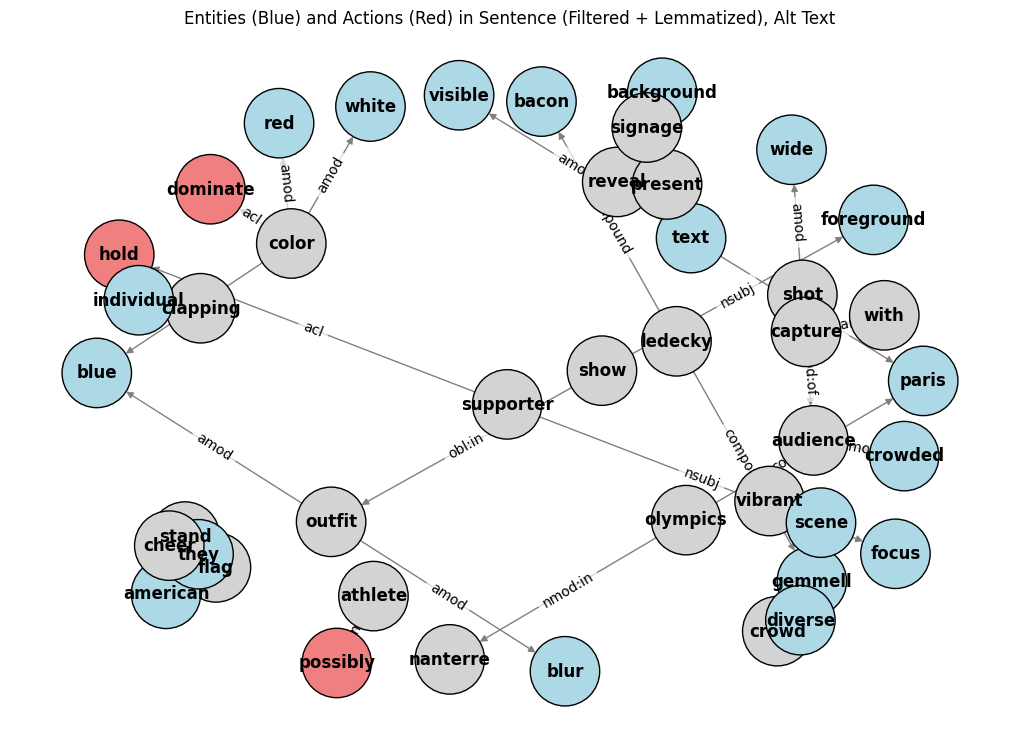

Caption: Supporters react as Katie Grimes, of the United States, receives her silver medal for the women's 400-meter individual medley final at the 2024 Summer Olympics, Monday, July 29, 2024, in Nanterre, France. (AP Photo/Matthias Schrader)
Alt Text: Wide shot of a crowded audience at the 2024 Paris Olympics in Nanterre, France. The focus is on supporters holding American flags, wearing shirts with "Bacon Gemmell Ledecky" and "Paris 2024" text. They are standing and cheering, with some capturing the moment on smartphones. The foreground shows a person in a blue outfit, blurred, possibly an athlete. The background reveals a diverse crowd, with individuals clapping and smiling. The scene is vibrant with red, white, and blue colors dominating due to the flags and attire. No visible text is present in the background signage.
SPICE Score: 0.0


In [13]:
image_key = 'photos_for_semantic_search_poc/0009505effe24cb88b429411b36985f2.jpg'
get_scores(image_key, plot=True, display=False)

In [16]:
dataset_for_evaluation[dataset_for_evaluation["f1_score"] == dataset_for_evaluation[dataset_for_evaluation["f1_score"] > 0.0]["f1_score"].min()]["image_key"].values[0]

'photos_for_semantic_search_poc/01832175b62d4aa99d26402b27910475.jpg'

Caption Dependencies:<class 'list'> [{'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'uzbekistán'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'las'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'gradas'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'antes'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'del'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'duelo'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'del'}, {'governorGloss': 'c', 'dep': 'compound', 'dependentGloss': 'grupo'}, {'governorGloss': 'masculino', 'dep': 'compound', 'dependentGloss': 'fútbol'}, {'governorGloss': 'entre', 'dep': 'compound', 'dependentGloss': 'masculino'}, {'governorGloss': 'egipto', 'dep': 'compound', 'dependentGloss': 'entre'}, {'governorGloss': 'y', 'dep': 'compound', 'dependentGloss': 'uzbekistán'}, {'governorGloss': 'egipto', 'dep': 'compound', 'dependentGloss': 'y'}, {'governorGloss': 'beaujo

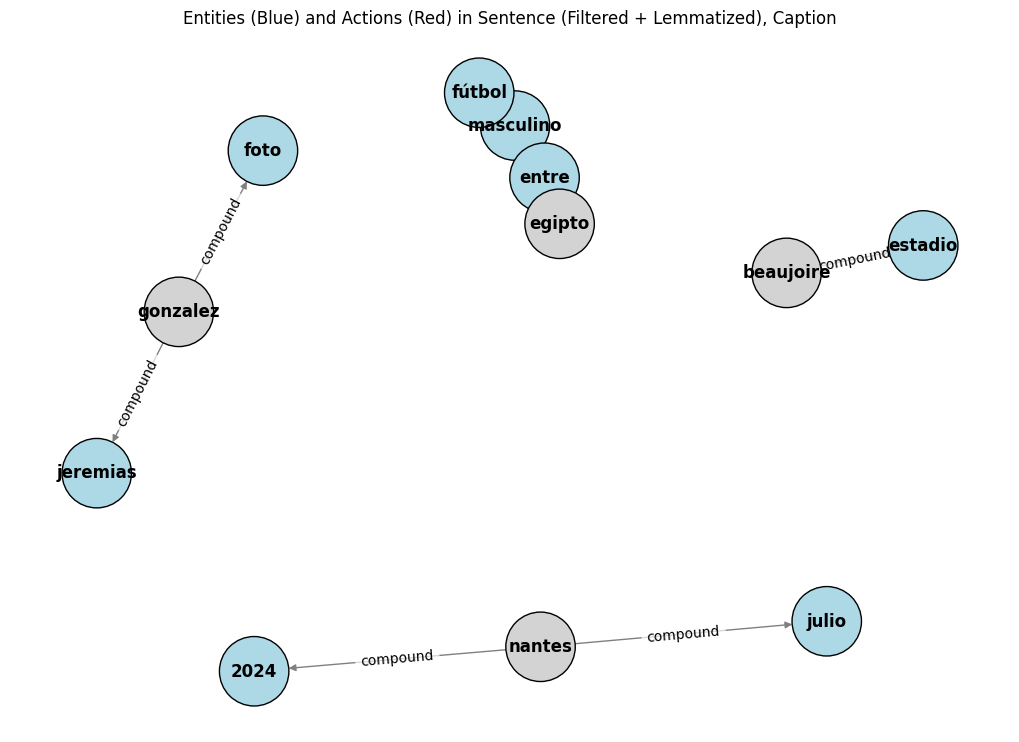

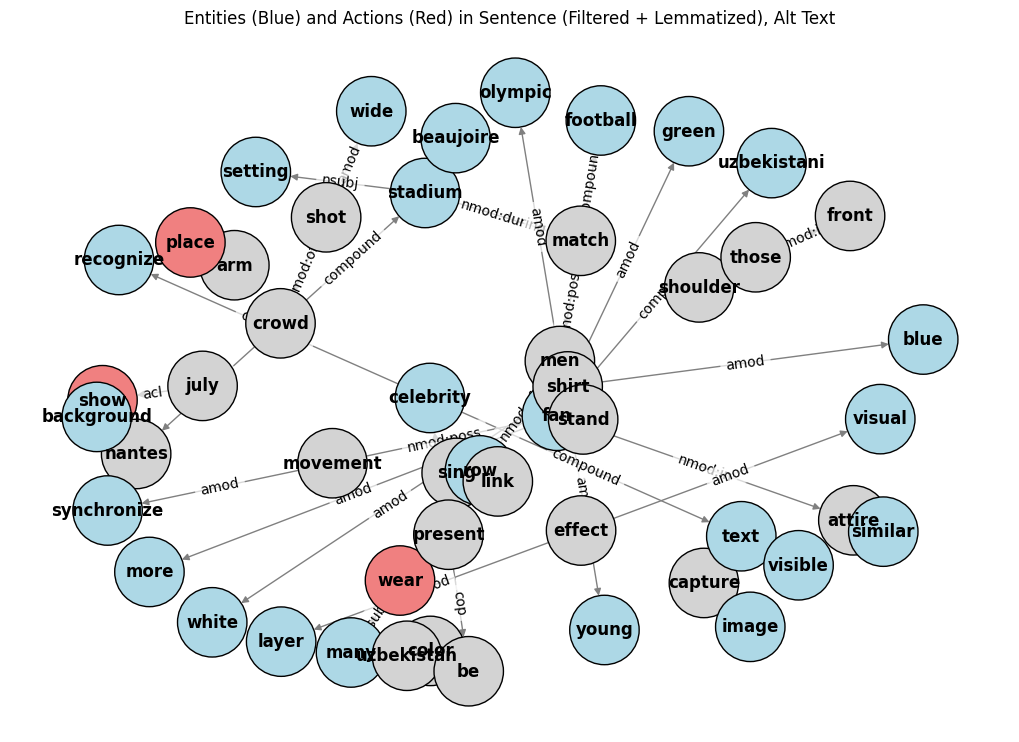

Caption: Aficionados de Uzbekistán cantan en las gradas antes del duelo del grupo C de fútbol masculino entre Uzbekistán y Egipto, en el estadio de La Beaujoire, durante los Juegos Olímpicos de 2024, el sábado 27 de julio de 2024 en Nantes, Francia. (AP Foto/Jeremias Gonzalez)
Alt Text: Wide shot of a stadium crowd in Nantes, France, on July 27, 2024, showing Uzbekistani fans. Rows of young men, wearing blue, white, and green shirts, are singing and linking arms. The fans are standing on bleachers, creating a layered visual effect. Many wear hats with Uzbekistan's colors. The image captures the fans' synchronized movements, with arms placed on shoulders of those in front. The background shows more fans in similar attire. The setting is the La Beaujoire stadium during the Olympic men's football match between Uzbekistan and Egypt. No visible text or recognized celebrities are present.
SPICE Score: 0.02816901408450704


In [17]:
image_key = 'photos_for_semantic_search_poc/01832175b62d4aa99d26402b27910475.jpg'
get_scores(image_key, plot=True, display=False)